In [1]:
import numpy as np
import matplotlib.pyplot as plt
from functions import *

In [2]:
u= []
L = 10 # comprimento da barra
Δx = 0.01
num_pontos = int(np.ceil(L/Δx))
Δt = 0.01
tempo_final = 100
k = 0.835
λ = k * Δt/Δx**2
condição_inicial = 0.
contorno = np.array([100.,50.])
variavel = np.ones(num_pontos) * condição_inicial
xx = np.arange(0,L,Δx)
tt = np.arange(0,tempo_final,Δt)
matriz_coeficiente = Implicito.gerarMatrizCoeficientes(num_pontos,λ)
matriz_ampliada = Implicito.gerarMatrizAmpliada(num_pontos,contorno,variavel,λ)

In [3]:
for _ in np.arange(0,tempo_final,Δt):
    variavel = np.linalg.solve(matriz_coeficiente,matriz_ampliada)
    u.append(variavel)
    matriz_ampliada = Implicito.gerarMatrizAmpliada(num_pontos,contorno,variavel,λ)

In [4]:
u = np.array(u)

In [5]:
xx[11]

0.11

salvar os dados gerados pelo método implicito

In [6]:
# dados = {"u":u.T}
# df = pd.DataFrame(dados)
# df.to_csv('dados metodo implicito.csv',index=False)

Text(0.5, 1.0, 'Solução numérica no ponto 8.0')

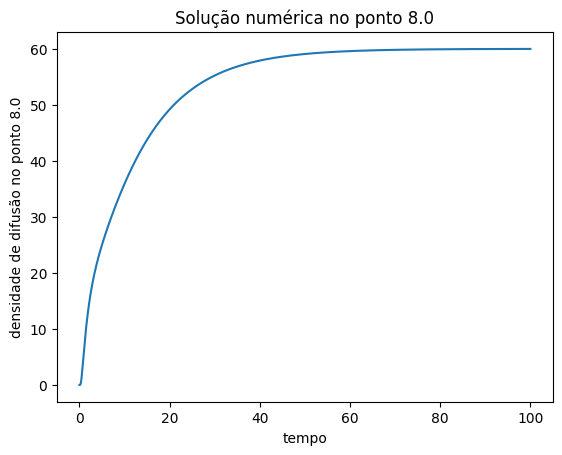

In [22]:
a = 800
plt.plot(tt,u[:,a])
plt.xlabel('tempo')
plt.ylabel(f'densidade de difusão no ponto {xx[a]}')
plt.title(f'Solução numérica no ponto {xx[a]}')

In [23]:
def f(x,t):
    global k
    somatorio = 0
    for n in range(1,1000):
        # print(somatorio)
        somatorio += 100*((-1)**n - 2)/(n * np.pi) * np.sin(n*np.pi*x/10)*np.exp(-k*(n* np.pi/10)**2*t)
    return 100 - 5*x + somatorio

Text(0.5, 1.0, 'Solução analitica u(8.0,t)')

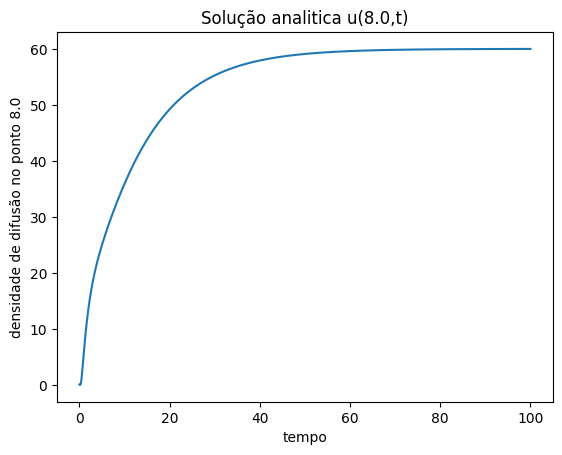

In [24]:
plt.plot(tt,f(xx[a],tt))
plt.xlabel('tempo')
plt.ylabel(f'densidade de difusão no ponto {xx[a]}')
plt.title(f'Solução analitica u({xx[a]},t)')

Text(0, 0.5, 'densidade de difusão no ponto 8.0')

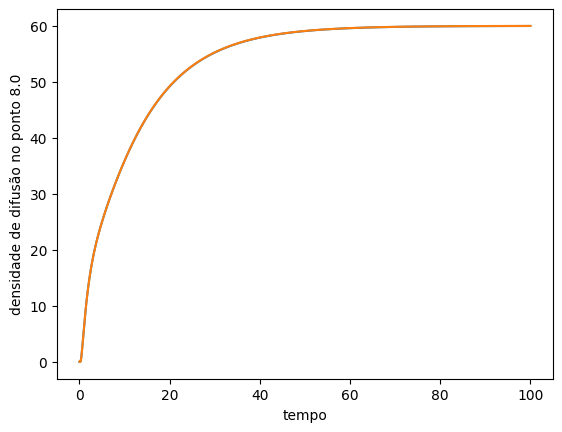

In [25]:
plt.plot(tt,u[:,a])
plt.plot(tt,f(xx[a],tt))
plt.xlabel('tempo')
plt.ylabel(f'densidade de difusão no ponto {xx[a]}')

In [26]:
erro_percentual = (f(xx[a],tt) - u[:,a].flatten())/f(xx[a],tt)

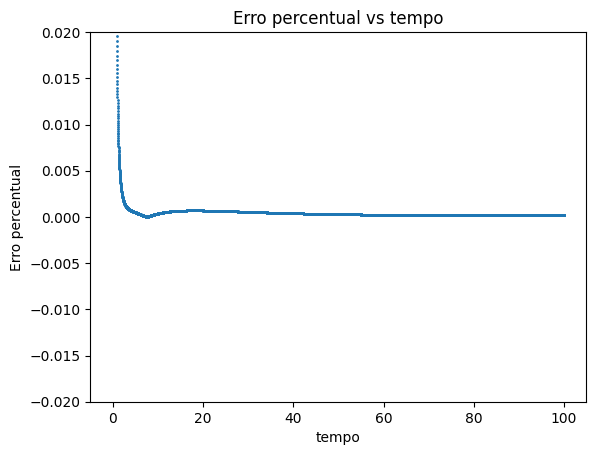

In [27]:
escala = .02
plt.scatter(tt,np.abs(erro_percentual),s=1)
plt.title("Erro percentual vs tempo")
plt.ylabel("Erro percentual")
plt.ylim(-escala,escala)
plt.xlabel("tempo")
plt.show()